# Life Expectancy and GDP Starter

### Objectives

This is the second project of my data analysis portfolio. The goals of this analysis are to find a correlation between the life expectancy and economic output arranged by countries over 15 years of time from year 2000 to 2015.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
csv_files = 'all_data.csv'
data = pd.read_csv(csv_files)
print(data.shape)
print(data.Country.unique())

(96, 4)
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


While loading the data using pandas function, I used the shape property get the total rows and columns. There are 96 observables or row and 4 attributes that can be analyzed.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


By just using the `.describe()` function, we can already see that the youngest life expectancy in the dataset is 44 years old and the oldest is 81 years old with the average life expectancy at 73 years old. 

### Data Cleaning

If we look at the column names, we can see that most of the columns have a short one word name while the third column 'Life expectancy at birth (years)' is a 5 words long. In order to make the namings more consistent, I will rename it with the rename the column with a more concise and short acronym.

In [6]:
data = data.rename(columns={'Life expectancy at birth (years)': 'LEABY'})

In [7]:
data.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Data visualization

In this section, I will perform lots of data visualization to the dataset. Exploring the data is beneficial to get a better understanding of the data and reach our project goals which is to find any connection between GDP and life expectancy visually.

Text(0.5, 0, 'GDP in Trillions of U.S Dollars')

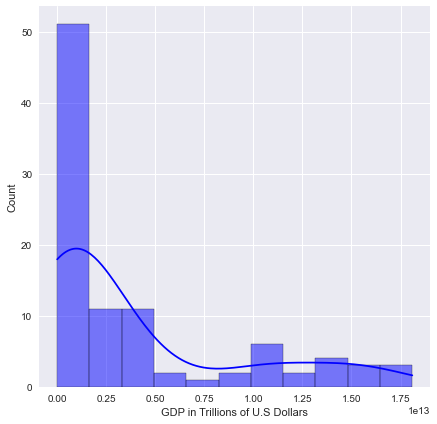

In [8]:
plt.style.use('seaborn')
plt.figure(figsize=(7,7))
sns.histplot(data.GDP, kde=True, color='blue', line_kws={"color": "black"}) #line_kws argument is not working?
plt.xlabel('GDP in Trillions of U.S Dollars')

The chart above is heavily right-skewed and oriented mostly on the left side. In the next step, we will take the life expectancy to the account and make its visualization.

Text(0.5, 0, 'Life Expectancy at Birth (Years)')

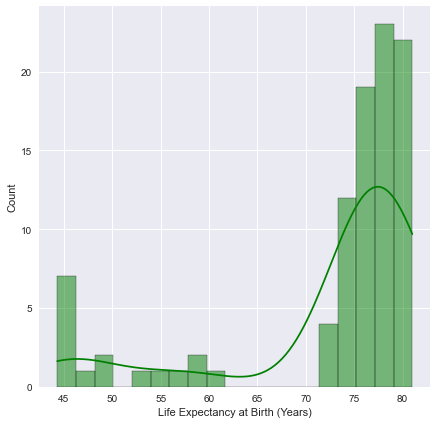

In [9]:
plt.style.use('seaborn')
plt.figure(figsize=(7,7))
sns.histplot(data.LEABY, kde=True, color='green', line_kws={"color": "black"}) #line_kws argument is not working?
plt.xlabel('Life Expectancy at Birth (Years)')

On the other hand, the distribution of life expectancy is left-skewed as it can be seen most of the data are on the right side of the chart. This could simply mean that the most average of life expectancy accross the countries in the dataset are around 70 to 80 years old. This reflects to the mean of LEABY values in the analysis we have done above using the `describe()` function.

### In-depth Analysis

After the brief analysis and visualization above, I would say the charts are just enough to get a sense of what the dataset is about. Looking at the first chart, it does not have a clear context to what it is explaining. We only know that most countries share the same range amount of GDP and that creates an outliers to the data.

In the next section, we will see more informative and appealing visualization to find the correlation between the two factors mentioned above.

In [10]:
data_by_country = data.groupby('Country').mean().reset_index()

Text(0, 0.5, 'Life Expectancy at Birth (years)')

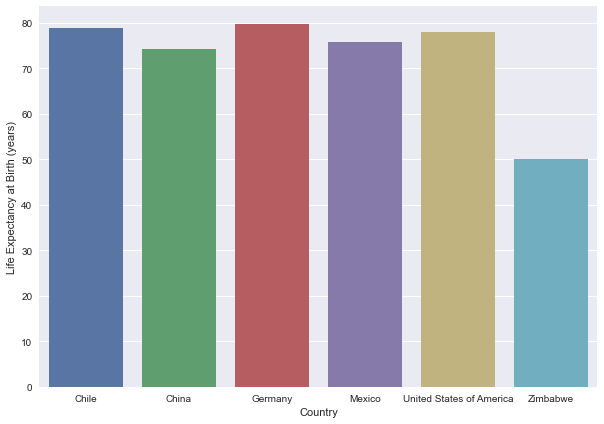

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
sns.barplot(x="Country", y='LEABY', data=data_by_country)
plt.ylabel("Life Expectancy at Birth (years)")

This chart provides more explanation regarding the average of life expectancy in 6 different countries. This visualization is achieved by grouping the data by the country and find the average of the values. This visualization is better at representing the average life expectancy especially to the stakeholders or external parties rather than presenting tables full of numbers.

Text(0, 0.5, 'Gross Domestic Products')

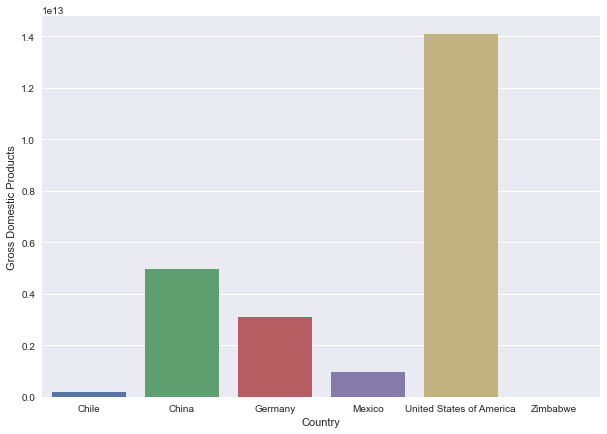

In [12]:
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
sns.barplot(x="Country", y='GDP', data=data_by_country)
plt.ylabel("Gross Domestic Products")

Similar with this barplot, we can see that U.S has generated the highest economic output compared to the other 5 countries with Zimbabwe generated the least GDP.

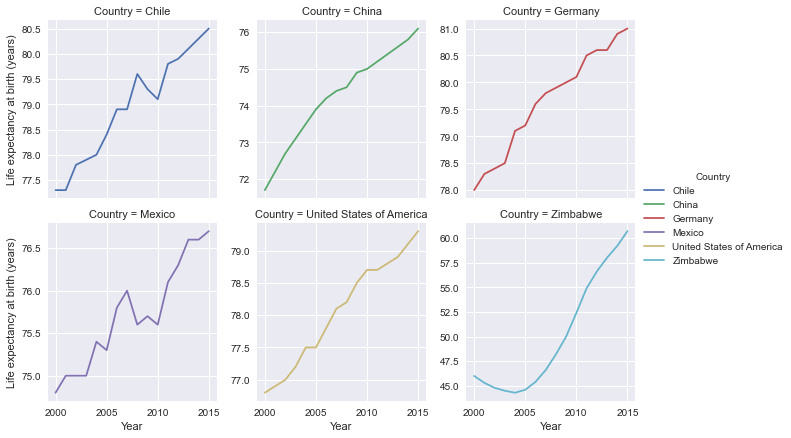

In [13]:
grids_leaby = sns.FacetGrid(data, col='Country', hue='Country', sharey=False, col_wrap=3)
grids_leaby = (grids_leaby.map_dataframe(sns.lineplot, x='Year', y='LEABY')
        .add_legend()
        .set_axis_labels("Year","Life expectancy at birth (years)"))

I used FacetGrid to plot 6 charts representing all the countries to compare life expectancy rate from 2000 to 2015. From this chart, we can determine that Zimbabwe has the shortest life expectancy compared to other countries in the sample dataset. In the lineplot below, instead of using `FacetGrid()`, I combined all the LEABY against the year all to see a better representation in comparing each country life expectancy.

<AxesSubplot:xlabel='Year', ylabel='LEABY'>

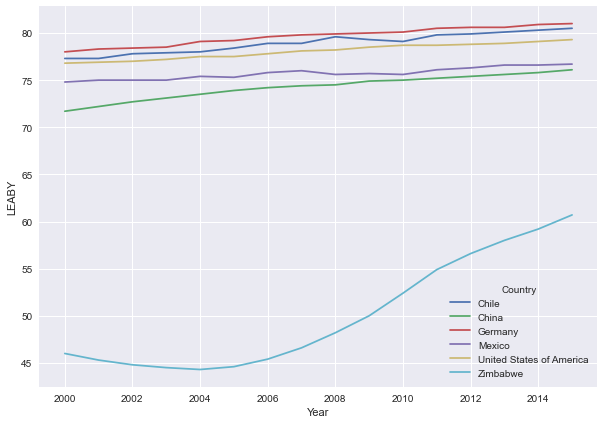

In [14]:
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='LEABY', data=data, hue='Country')

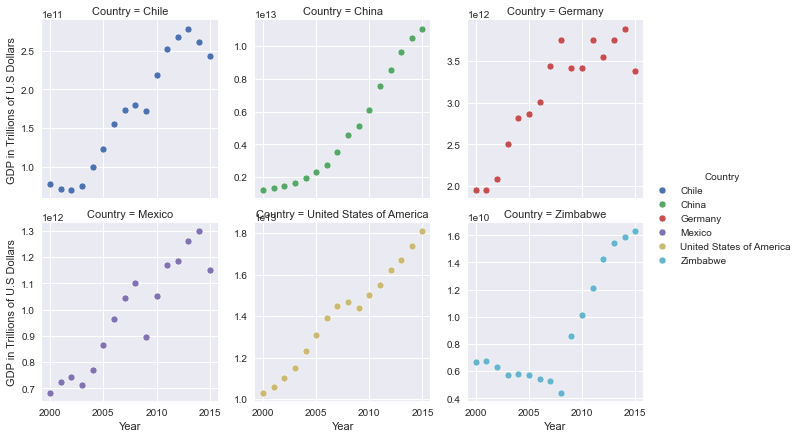

In [15]:
grids_gdp = sns.FacetGrid(data, col='Country', hue='Country', sharey=False, col_wrap=3)
grids_gdp = (grids_gdp.map_dataframe(sns.scatterplot, x='Year', y='GDP')
        .add_legend()
        .set_axis_labels("Year","GDP in Trillions of U.S Dollars"))

<AxesSubplot:xlabel='Year', ylabel='GDP'>

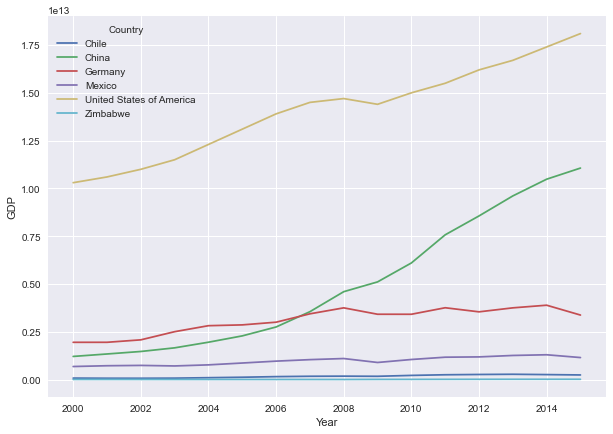

In [16]:
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='GDP', data=data, hue='Country')

In the 2 charts above, we are trying to compare each countries GDP and observe its increase over the period of 15 years.

### Conclusion

While observing the charts and data above, there are a few points we can conclude to answer some questions in regards to our analysis goals, as follows:
* The average life expectancy is approximately 73 years old.
* The distribution in life expectancy is heavily left-skewed which means that most of the value are on the right side.
* Both life expectancy and GDP in each country do share a similarity as they all increase over the period of years.
* Zimbabwe experienced a substantial increase in the life expectancy by around 20 years old.
* On the other hand, China had surged significantly in their economic output compared to other countries.